### Feature Selection Exercie

In this exercise, we will apply Feature Selection to a Iris flowers dataset, where the target variable is the Species. Essentially, our goal is to identify the features that are most relevant in discerning the species of each Iris flower. The dataset is from: https://www.kaggle.com/datasets/uciml/iris

1. Load the dataset from the exercise's Github Repository (Iris.csv)
2. Using buisness logic/common sense, drop features that are surely irrevelvant to the target variable.
3. Preprocess your data (split data into training and testing)
4. Apply feature selection.
6. Compare the results of each feature selection method:
    - What features did you manually dropped before applying the feature selection methods? Explain why.
    - Are there any common features selected across multiple methods?
    - Can you explain why certain features were selected based on their characteristics?

(Optional) Visualize the importance of features using techniques like bar charts or heatmaps to make it easier to compare.



In [1]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,YearCollected,MonthCollected,StigmaLegnth,Species
0,1,5.1,3.5,1.4,0.2,Purple,2003,2,2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Orange,1998,9,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Black,1995,5,3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,White,2008,3,3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Teal,2007,9,1,Iris-setosa


In [3]:
data = data.dropna()

le = LabelEncoder()
data["FlowerColour"] = le.fit_transform(data["FlowerColour"])
data["Species"] = le.fit_transform(data["Species"])

X = data.drop("Species", axis=1)
y = data["Species"]

In [4]:
# Dropping irrelevant features
X = X.drop(['Id','YearCollected','MonthCollected'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,StigmaLegnth
0,5.1,3.5,1.4,0.2,13,2
1,4.9,3.0,1.4,0.2,11,1
2,4.7,3.2,1.3,0.2,1,3
3,4.6,3.1,1.5,0.2,18,3
4,5.0,3.6,1.4,0.2,16,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,13,3
146,6.3,2.5,5.0,1.9,7,4
147,6.5,3.0,5.2,2.0,15,2
148,6.2,3.4,5.4,2.3,7,4


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Selection

In [6]:
scorefunc = [mutual_info_classif, chi2, f_classif]
scorefunc_text = ["mutual_info_classif", "chi2", "f_classif"]
funcs = (scorefunc,scorefunc_text)
k = 3

In [7]:
print("For SelectKBest() - Top 3 scores")
for (func, text) in zip(*funcs):
    selector = SelectKBest(score_func=func, k=k)
    selected_features = selector.fit(X_train, y_train).get_support(indices=True)
    print(f"Features selected by {text}:", X_train.columns[selected_features])

For SelectKBest() - Top 3 scores
Features selected by mutual_info_classif: Index(['PetalLengthCm', 'PetalWidthCm', 'StigmaLegnth'], dtype='object')
Features selected by chi2: Index(['PetalLengthCm', 'PetalWidthCm', 'StigmaLegnth'], dtype='object')
Features selected by f_classif: Index(['PetalLengthCm', 'PetalWidthCm', 'StigmaLegnth'], dtype='object')


## Correlation Visualization

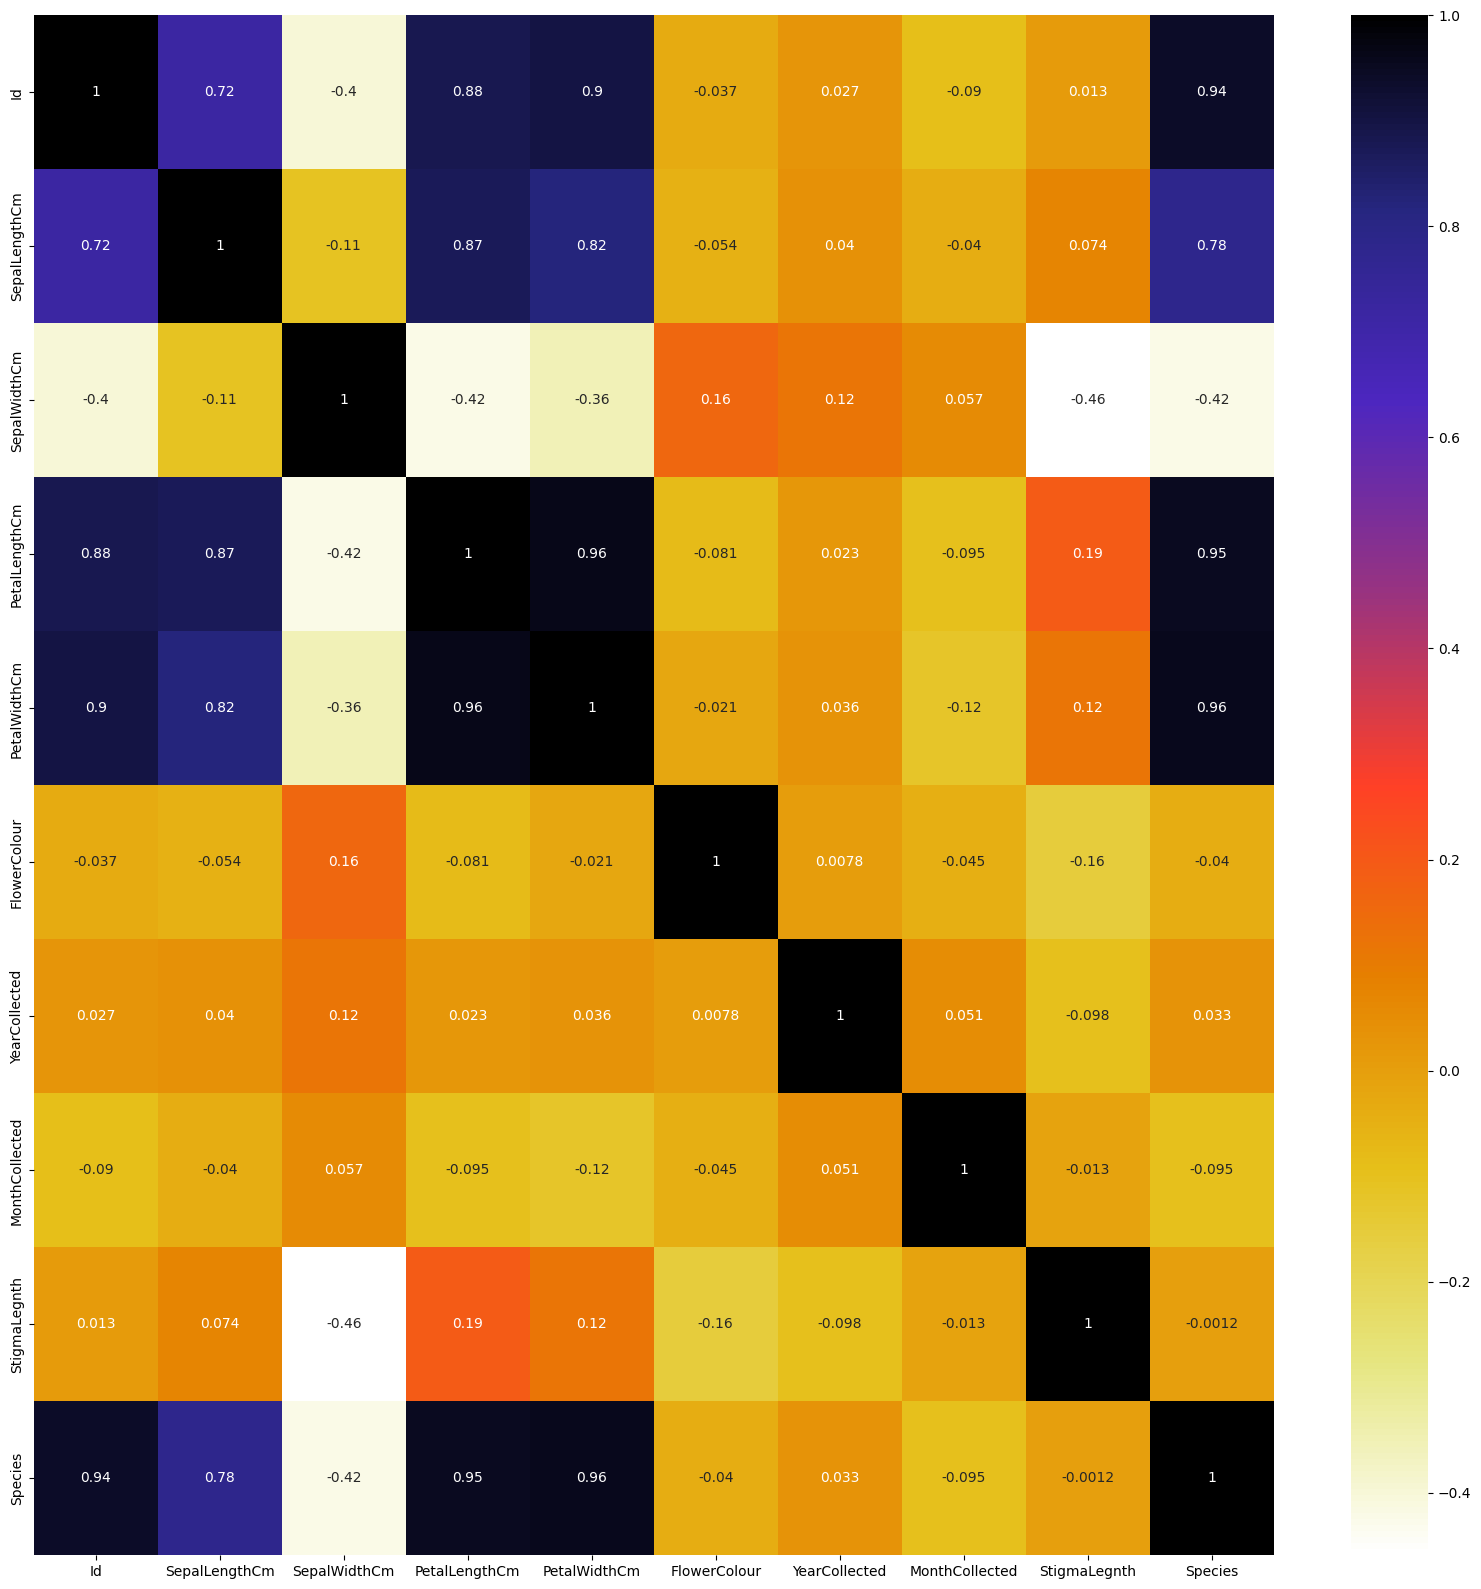

In [8]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True , cmap=plt.cm.CMRmap_r)
plt.show()

[0.10751573 0.03760376 0.2223772  0.27474205 0.00537892 0.35238234]


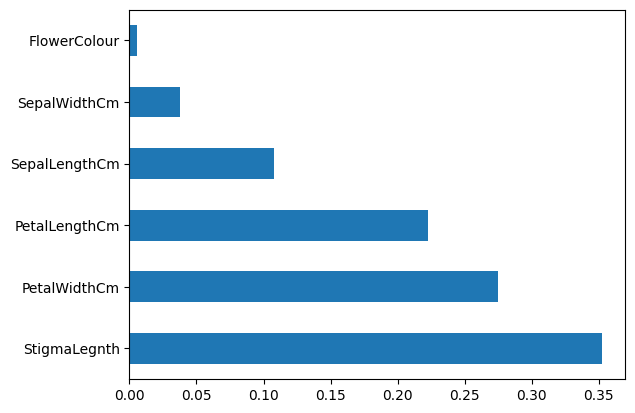

In [9]:
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 
model = ExtraTreesClassifier() 
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh')
plt.show()